# Goodwin's oscillator toy model

This example shows how the Goodwin's Oscillator toy model can be used.

This model has five parameters, and three oscillating states. In this example we only 'observe' one of these states, making the problem very hard to solve.

In [1]:
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt
import numpy as np

model = pints.toy.GoodwinOscillatorModel()

We can get an example set of parameters using the `suggested_parameters()` method:

In [2]:
real_parameters = model.suggested_parameters()

In the same way, we can get a suggested set of sampling times:

In [3]:
times = model.suggested_times()

Now we can run a simulation:

In [4]:
values = model.simulate(real_parameters, times)

This gives us all we need to create a plot of current versus time:

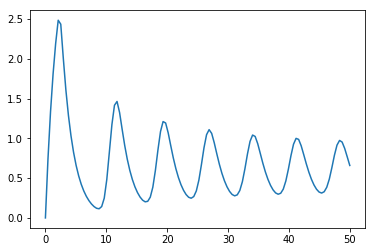

In [5]:
plt.figure()
plt.plot(times, values)
plt.show()

Now we will add some noise to generate some fake "experimental" data and try to recover the original parameters.

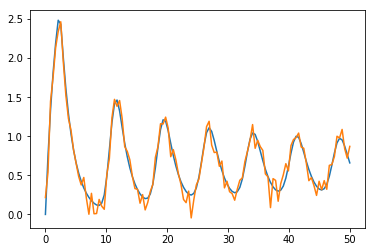

In [6]:
noise = 0.1
noisy_values = values + np.random.normal(0, noise, values.shape)

plt.figure()
plt.plot(times, values)
plt.plot(times, noisy_values)
plt.show()

Now we can try and infer the original parameters:

In [7]:
# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([0.01]*5, [3]*5)
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[0.1]*5]*3
mcmc = pints.MCMCSampling(log_posterior, 3, x0)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Done!


Now we can expect the resulting chains:

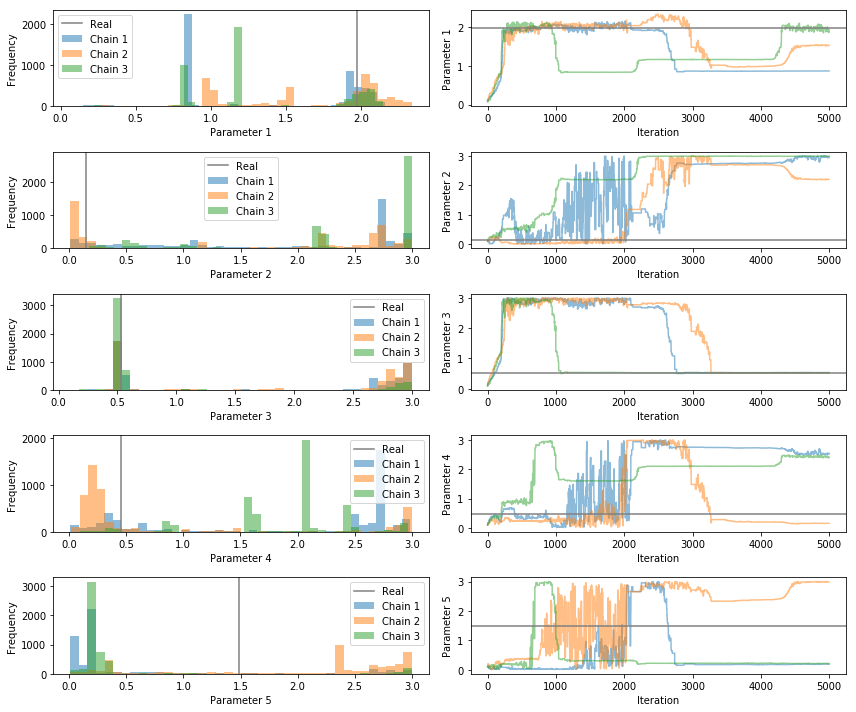

In [8]:
fig, axes = pints.plot.trace(*chains)
for i in range(5):
    axes[i, 0].axvline(real_parameters[i], color='gray', label='Real')
    axes[i, 0].legend()
    axes[i, 1].axhline(real_parameters[i], color='gray')
plt.show()

This is a pretty hard problem for MCMC!